# Universidad del Valle de Guatemala
# (CC3093) Security Data Science
# Proyecto 2 - Modelo de Detección de Fraude
# Santiago Taracena Puga (20017)

## Documento: Desarrollo del modelo 1 (Red Neuronal)

## Introducción

En el ámbito de la seguridad informática y la detección de fraudes, el análisis de datos se ha convertido en un pilar fundamental para identificar patrones y anomalías que puedan indicar actividades fraudulentas. En este contexto, el uso de modelos de Machine Learning y Deep Learning ha demostrado ser una herramienta poderosa para detectar transacciones fraudulentas en tiempo real, permitiendo a las instituciones financieras proteger los activos de sus clientes y salvaguardar la integridad de sus sistemas.

El presente proyecto surge en colaboración entre el Convenio PLUS TI y la Universidad del Valle, con el objetivo de investigar la viabilidad y eficacia del entrenamiento incremental en modelos de aprendizaje automático y profundo aplicados a la detección de fraudes en transacciones de tarjeta de crédito. Este estudio se realiza utilizando un dataset simulado que abarca transacciones realizadas desde el 1 de enero de 2019 hasta el 31 de diciembre de 2020, donde se incluyen tanto transacciones legítimas como fraudulentas.

El enfoque adoptado se centra en dos partes principales. En primer lugar, se lleva a cabo una investigación teórica exhaustiva sobre el entrenamiento incremental en los algoritmos seleccionados, destacando sus capacidades, limitaciones y las mejores prácticas asociadas. Esta revisión bibliográfica proporcionará un marco conceptual sólido para comprender el contexto y los desafíos del entrenamiento incremental en el ámbito de la detección de fraudes.

En segunda instancia, se procede con la implementación práctica de modelos de Machine Learning y Deep Learning, utilizando algoritmos como Redes Neuronales Artificiales (ANN), LightGBM, XGBoost, Random Forest y Máquinas de Vectores de Soporte (SVM). Se parte de un análisis exploratorio de datos (EDA) para comprender las características del dataset, seguido de un proceso de feature engineering para crear nuevas características relevantes para la detección de fraudes. Además, se exploran técnicas de manejo de datos desequilibrados, afinación de hiperparámetros y estrategias de early stopping para mejorar el rendimiento de los modelos.

La evaluación de los modelos se realiza comparando su rendimiento antes y después del entrenamiento incremental, utilizando métricas como ROC-AUC, precisión, recall y F1-score. Se presta especial atención a la capacidad de detección de transacciones fraudulentas y a cualquier pérdida significativa de rendimiento que pueda surgir como resultado del entrenamiento incremental.

Finalmente, se propone una metodología para decidir cuándo es preferible realizar un reentrenamiento total en lugar de uno incremental, basándose en la literatura existente y en los resultados experimentales obtenidos. Esta metodología se valida empíricamente utilizando los modelos entrenados, y se proporcionan conclusiones y recomendaciones para futuras investigaciones o aplicaciones prácticas en el campo de la seguridad de datos financieros.

## Parte 1: Entrenamiento Incremental

### Desarrollo del modelo 1 (Red neuronal)

In [42]:
# Instrucción para importar la librería pandas
import pandas as pd

In [43]:
# Lectura del dataset con los features necesarios
data = pd.read_csv("./data/dataset-v2.csv")
data.head()

,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_second,transaction_cc_num_length,transaction_cc_num_unique_digits_count,transaction_cc_num_digits_sum,...,transaction_amount_change,transaction_lat_change,transaction_long_change,location_change,transaction_count_per_category,avg_amount_per_category,transaction_amount_last_7_days,transaction_amount_last_month,std_transaction_amount,cv_transaction_amount
0,0,2019,1,1,0,6,56,15,8,54,...,NaN,NaN,NaN,0.000000,5654,132.379484,71.22,71.22,126.447035,1.673431
1,0,2019,1,1,0,17,16,15,7,54,...,-24.94,12.8254,8.3093,1556.500349,2112,59.030284,117.50,117.50,126.447035,1.673431
2,0,2019,1,1,0,22,36,15,7,76,...,-42.62,3.1423,-48.0660,3714.630408,4419,94.525207,121.16,121.16,126.447035,1.673431
3,0,2019,1,1,0,32,15,15,8,72,...,126.74,-0.8190,34.0860,2775.387784,5654,132.379484,251.56,251.56,126.447035,1.673431
4,0,2019,1,1,1,9,57,15,7,54,...,-126.61,-2.3233,13.9800,1226.358716,2541,90.435702,255.35,255.35,126.447035,1.673431


In [44]:
# Instrucción para importar LabelEncoder y codificar variables categóricas
from sklearn.preprocessing import LabelEncoder

In [45]:
# Instancia y retorno de LabelEncoder
encoder = LabelEncoder()
encoder

LabelEncoder()

In [46]:
# Lista de variables categóricas a codificar
labels_to_encode = [
    "transaction_merchant",
    "transaction_category",
    "transaction_gender",
    "transaction_job",
    "transaction_time_of_day",
    "transaction_time_period",
    "transaction_season",
]
labels_to_encode

['transaction_merchant',
 'transaction_category',
 'transaction_gender',
 'transaction_job',
 'transaction_time_of_day',
 'transaction_time_period',
 'transaction_season']

In [47]:
# Ciclo que codifica todas las variables categóricas listadas
for label in labels_to_encode:
    data[label] = encoder.fit_transform(data[label])

# Primeras cinco filas del dataset para observar la codificación
data.head()

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_second,transaction_cc_num_length,transaction_cc_num_unique_digits_count,transaction_cc_num_digits_sum,...,transaction_amount_change,transaction_lat_change,transaction_long_change,location_change,transaction_count_per_category,avg_amount_per_category,transaction_amount_last_7_days,transaction_amount_last_month,std_transaction_amount,cv_transaction_amount
0,0,2019,1,1,0,6,56,15,8,54,...,NaN,NaN,NaN,0.000000,5654,132.379484,71.22,71.22,126.447035,1.673431
1,0,2019,1,1,0,17,16,15,7,54,...,-24.94,12.8254,8.3093,1556.500349,2112,59.030284,117.50,117.50,126.447035,1.673431
2,0,2019,1,1,0,22,36,15,7,76,...,-42.62,3.1423,-48.0660,3714.630408,4419,94.525207,121.16,121.16,126.447035,1.673431
3,0,2019,1,1,0,32,15,15,8,72,...,126.74,-0.8190,34.0860,2775.387784,5654,132.379484,251.56,251.56,126.447035,1.673431
4,0,2019,1,1,1,9,57,15,7,54,...,-126.61,-2.3233,13.9800,1226.358716,2541,90.435702,255.35,255.35,126.447035,1.673431


In [48]:
# Separar características y etiquetas
X = data.drop("is_fraud", axis=1).fillna(0)
y = data["is_fraud"]

#### 1.2.3. Manejo de Datos Desequilibrados

El manejo de datos desequilibrados es una parte crucial en la construcción de modelos de detección de fraude, dado que la proporción de transacciones fraudulentas es extremadamente baja en comparación con las transacciones legítimas. En nuestro caso, el dataset presentaba un desequilibrio significativo, con el 99.5% de las transacciones etiquetadas como no fraudulentas y solo el 0.5% como fraudulentas. Este desequilibrio puede llevar a que los modelos de machine learning se inclinen a predecir siempre la clase mayoritaria, resultando en una alta exactitud superficial pero una baja efectividad en la detección de fraude.

Para abordar este problema, se implementaron dos técnicas principales: RandomUnderSampler y SMOTE (Synthetic Minority Over-sampling Technique). Estas técnicas fueron seleccionadas para equilibrar las clases y mejorar la capacidad del modelo para detectar transacciones fraudulentas.

##### RandomUnderSampler

El RandomUnderSampler es una técnica que reduce el número de instancias de la clase mayoritaria para equilibrar el dataset. En este caso, se redujo la cantidad de transacciones no fraudulentas para igualar el número de transacciones fraudulentas. Aunque esta técnica puede resultar en la pérdida de información valiosa debido a la eliminación de datos, es efectiva para situaciones donde el dataset es lo suficientemente grande y la pérdida de datos no compromete la integridad del modelo. El proceso implicó seleccionar aleatoriamente un subconjunto de las transacciones no fraudulentas para que el número de instancias en ambas clases fuera aproximadamente igual.

El uso del RandomUnderSampler fue beneficioso al reducir el sesgo del modelo hacia la clase mayoritaria y permitirle aprender patrones significativos en las transacciones fraudulentas. Sin embargo, la reducción de datos también implica que el modelo tiene menos información para aprender sobre la clase mayoritaria, lo que puede afectar su capacidad para generalizar correctamente sobre transacciones legítimas en el mundo real.

##### SMOTE (Synthetic Minority Over-sampling Technique)

Para complementar el enfoque de submuestreo, se aplicó SMOTE, una técnica que genera ejemplos sintéticos de la clase minoritaria para aumentar su presencia en el dataset. SMOTE funciona creando nuevas instancias basadas en las características de los vecinos más cercanos de las instancias minoritarias existentes. Este método no solo aumenta el número de transacciones fraudulentas sino que también ayuda a mantener la diversidad y representatividad de la clase minoritaria.

La implementación de SMOTE involucró identificar las transacciones fraudulentas y generar ejemplos adicionales basados en estas. Esto permitió aumentar el número de transacciones fraudulentas en el dataset sin simplemente duplicar las existentes, lo que podría llevar a un sobreajuste. Los ejemplos sintéticos creados por SMOTE permitieron al modelo aprender una gama más amplia de características de fraude, mejorando su capacidad para detectar fraudes no vistos previamente.

##### Proceso de Implementación

El proceso comenzó con la separación de las características (X) y las etiquetas (y) del dataset original. Posteriormente, se aplicó el RandomUnderSampler para reducir el número de transacciones no fraudulentas, equilibrando así las clases de forma inicial. A continuación, se aplicó SMOTE sobre el dataset submuestreado para generar nuevas instancias de la clase minoritaria y enriquecer la variedad de ejemplos de fraude. Este enfoque combinado aprovechó las fortalezas de ambas técnicas: la simplicidad y efectividad del submuestreo y la capacidad de SMOTE para generar nuevos ejemplos diversificados.

Este enfoque resultó en un dataset equilibrado que mejoró significativamente la capacidad del modelo para detectar fraudes. La combinación de RandomUnderSampler y SMOTE permitió mitigar el impacto del desequilibrio de clases, resultando en un modelo que no solo reconoce transacciones legítimas con alta precisión sino que también captura la mayoría de las transacciones fraudulentas. Este balance es crítico para la efectividad y confiabilidad del sistema de detección de fraude en aplicaciones del mundo real.

In [49]:
# Librerías para manejar el desbalance de categorías
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [50]:
# Submuestrear clase mayoritaria
rus = RandomUnderSampler(random_state=123)
X_resampled, y_resampled = rus.fit_resample(X, y)

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [51]:
# Aplicar SMOTE
smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [52]:
# Nueva data con el desbalance arreglado
data = pd.concat([X_resampled, y_resampled], axis=1)
data.shape

(19302, 89)

In [53]:
# Datos que no son fraude
data[data["is_fraud"] == 0]["is_fraud"].count()

9651

In [54]:
# Datos que sí son fraude
data[data["is_fraud"] == 1]["is_fraud"].count()

9651

#### 1.2.4. Desarrollo del modelo tradicional

El desarrollo del modelo tradicional comenzó con la implementación de una red neuronal diseñada para detectar transacciones fraudulentas en un dataset altamente desequilibrado. Este proceso implicó varias etapas, desde la preprocesamiento de datos hasta la evaluación final del modelo. A continuación se describe detalladamente cada una de estas etapas.

##### Preprocesamiento de Datos

El primer paso en el desarrollo del modelo fue preparar los datos para el entrenamiento. El dataset original contenía una mezcla de características categóricas y numéricas, todas las cuales necesitaban ser normalizadas para garantizar que el modelo pudiera aprender de manera efectiva. Utilizamos la clase StandardScaler de la biblioteca scikit-learn para estandarizar las características. La normalización implicó ajustar cada característica para que tuviera una media de 0 y una desviación estándar de 1. Este paso es crucial en redes neuronales porque asegura que los pesos de las neuronas se actualicen de manera consistente durante el entrenamiento.

Para llevar a cabo esta normalización, primero dividimos el dataset en características (X) y etiquetas (y), y luego separamos los datos en conjuntos de entrenamiento y prueba utilizando train_test_split. Esto nos permitió evaluar el rendimiento del modelo en un subconjunto de datos que no fue utilizado durante el entrenamiento, proporcionando una evaluación más realista de su desempeño.

##### Diseño del Modelo de Red Neuronal

El diseño del modelo de red neuronal involucró la definición de una arquitectura adecuada para la tarea de clasificación binaria. Utilizamos la biblioteca TensorFlow y su API Keras para construir el modelo. La arquitectura del modelo constaba de tres capas densas. La primera capa, con 64 neuronas y función de activación ReLU, fue seguida por una segunda capa de 32 neuronas también con activación ReLU. La capa de salida tenía una sola neurona con una función de activación sigmoide, adecuada para predecir probabilidades en un problema de clasificación binaria.

La elección de las funciones de activación ReLU y sigmoide fue estratégica. ReLU ayuda a mitigar el problema del desvanecimiento del gradiente, permitiendo un entrenamiento más eficiente de redes profundas. La función sigmoide en la capa de salida fue elegida porque produce una salida entre 0 y 1, interpretada como la probabilidad de que una transacción sea fraudulenta.

##### Compilación y Entrenamiento del Modelo

Una vez definida la arquitectura, compilamos el modelo utilizando el optimizador Adam y la función de pérdida binary_crossentropy, adecuada para problemas de clasificación binaria. El optimizador Adam fue seleccionado por su capacidad para ajustar los parámetros del modelo de manera eficiente y robusta, combinando las ventajas de los algoritmos de optimización de AdaGrad y RMSProp.

El modelo fue entrenado durante 10 épocas con un tamaño de lote de 64, utilizando el conjunto de datos de entrenamiento. Durante el entrenamiento, monitorizamos la pérdida y la exactitud tanto en los conjuntos de entrenamiento como de validación, permitiéndonos observar el progreso y detectar signos de sobreajuste. El uso de un tamaño de lote moderado ayudó a balancear la eficiencia del entrenamiento y la estabilidad de la actualización de pesos.

##### Evaluación del Modelo

Tras completar el entrenamiento, evaluamos el modelo utilizando el conjunto de datos de prueba. La evaluación inicial mostró una alta exactitud, pero esto se debió en gran medida al desequilibrio de clases en el dataset. Para obtener una visión más precisa del rendimiento del modelo, calculamos métricas adicionales como la precisión, el recall y el F1 Score, además de analizar la matriz de confusión.

Los resultados indicaron que, aunque el modelo alcanzó una exactitud elevada, su capacidad para detectar transacciones fraudulentas (recall) y la precisión al identificar dichas transacciones eran más críticas. La precisión reflejaba la proporción de transacciones predichas correctamente como fraudulentas entre todas las predichas como tales, mientras que el recall medía la proporción de transacciones fraudulentas correctamente identificadas entre todas las realmente fraudulentas. El F1 Score proporcionó una medida balanceada del rendimiento considerando tanto la precisión como el recall.

In [55]:
# Tensorflow y herramientas similares
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers

In [56]:
# Variable dependiente e independiente
X = data.drop("is_fraud", axis=1)
y = data["is_fraud"]

In [57]:
# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [58]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [59]:
# Definir el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [60]:
# Compilar el modelo
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [61]:
# Early stopping para reducir el overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
early_stopping

In [62]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.8014 - val_loss: 0.3115 - val_accuracy: 0.9241
Epoch 2/10
242/242 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.9155 - val_loss: 0.2423 - val_accuracy: 0.9466
Epoch 3/10
242/242 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.9387 - val_loss: 0.2117 - val_accuracy: 0.9557
Epoch 4/10
242/242 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.9450 - val_loss: 0.1924 - val_accuracy: 0.9573
Epoch 5/10
242/242 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9525 - val_loss: 0.1786 - val_accuracy: 0.9609
Epoch 6/10
242/242 [==============================] - 0s 1ms/step - loss: 0.1996 - accuracy: 0.9550 - val_loss: 0.1656 - val_accuracy: 0.9622
Epoch 7/10
242/242 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9586 - val_loss: 0.1540 - val_accuracy: 0.9640
Epoch 

In [63]:
# Funciones para obtener métricas del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
# Predecir las probabilidades de clase en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

121/121 [==============================] - 0s 673us/step


In [65]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [66]:
# Impresión de las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9678839678839679
Precision: 0.9679089026915114
Recall: 0.9679089026915114
F1 Score: 0.9679089026915114
Confusion Matrix:
[[1867   62]
 [  62 1870]]


Los resultados obtenidos del entrenamiento de la red neuronal de forma tradicional revelan un rendimiento notablemente sólido en la detección de transacciones fraudulentas. Con una exactitud del 96.79%, el modelo logró clasificar correctamente la gran mayoría de las transacciones, tanto fraudulentas como legítimas. Este alto nivel de precisión es un indicador alentador de la eficacia del modelo en la tarea de detección de fraude.

La precisión, que representa la proporción de transacciones fraudulentas identificadas correctamente entre todas las transacciones clasificadas como fraudulentas, alcanzó un impresionante 96.79%. Esto significa que el modelo tiene una baja tasa de falsos positivos, es decir, identifica pocas transacciones legítimas como fraudulentas, lo cual es crucial para mantener la confianza del usuario y minimizar el impacto en las operaciones comerciales normales.

El recall, que mide la proporción de transacciones fraudulentas correctamente identificadas entre todas las transacciones fraudulentas reales, también alcanzó un valor del 96.79%. Este alto valor indica que el modelo es capaz de capturar la gran mayoría de las transacciones fraudulentas presentes en el conjunto de datos. Un recall alto es esencial en la detección de fraude, ya que garantiza que se identifiquen la mayor cantidad posible de transacciones fraudulentas, minimizando así el riesgo de pérdidas para la empresa.

El F1 Score, que es una medida ponderada de precisión y recall, también se sitúa en un impresionante 96.79%. Esta métrica proporciona una evaluación balanceada del rendimiento del modelo, teniendo en cuenta tanto la capacidad de identificar transacciones fraudulentas como su precisión en dicha identificación. Un F1 Score alto indica que el modelo logra un equilibrio efectivo entre precisión y recall, lo cual es fundamental para una detección de fraude eficaz.

La matriz de confusión confirma estos resultados, mostrando un número muy bajo de falsos positivos y falsos negativos. Con solo 62 falsos positivos y 62 falsos negativos, el modelo demuestra una capacidad sólida para distinguir entre transacciones fraudulentas y legítimas, lo cual es esencial para la toma de decisiones precisa en la gestión de riesgos y la protección de los activos de la empresa.

Los resultados obtenidos del entrenamiento de la red neuronal de forma tradicional indican un rendimiento excepcional en la detección de fraude. Con una combinación impresionante de alta precisión, recall y F1 Score, el modelo demuestra ser una herramienta eficaz para mitigar los riesgos asociados con las transacciones fraudulentas y proteger los intereses de la empresa. Estos resultados son alentadores y sugieren que el modelo puede ser implementado con confianza en entornos comerciales para mejorar la seguridad y la integridad de las operaciones financieras.

El siguiente entrenamiento a realizar es el entrenamiento incremental. Se realizará una comparación entre el entrenamiento usual realizado y los resultados obtenidos por este mismo approach y los resultados obtenidos por medio del entrenamiento incremental.

#### 1.2.5. Desarrollo del modelo incremental

El proceso de desarrollo del modelo de red neuronal incremental implicó una estrategia innovadora para abordar los desafíos de la detección de fraudes en un entorno dinámico y cambiante. A continuación, se detallan las etapas clave de este proceso:

##### Preprocesamiento de Datos Continuo

Una de las características distintivas del enfoque incremental es su capacidad para adaptarse a la llegada de nuevos datos de forma continua. En este sentido, se implementó un proceso de preprocesamiento de datos continuo que permitió incorporar nuevos ejemplos de transacciones a medida que se generaban. Esto incluyó la normalización de características y la actualización de estadísticas relevantes, como la media y la desviación estándar, para garantizar que el modelo estuviera siempre trabajando con datos actualizados y representativos de la distribución actual de los datos.

##### Entrenamiento Adaptativo

En lugar de entrenar el modelo desde cero cada vez que llegaban nuevos datos, se adoptó un enfoque de entrenamiento adaptativo que aprovechaba el conocimiento previo del modelo para actualizar sus pesos de manera incremental. Esto se logró mediante técnicas como el aprendizaje online o el entrenamiento por lotes pequeños, donde el modelo se actualizaba con nuevos ejemplos de datos sin necesidad de reentrenarlo por completo. Esta capacidad de adaptación permitió al modelo ajustarse continuamente a medida que se producían cambios en la distribución de los datos, mejorando así su capacidad de detección de fraudes.

##### Evaluación Continua del Rendimiento

Para garantizar la efectividad del modelo en la detección de fraudes a lo largo del tiempo, se estableció un sistema de evaluación continua del rendimiento. Esto implicó monitorear métricas clave, como la precisión, el recall y el F1 Score, en intervalos regulares y ajustar el modelo en consecuencia si se observaban cambios significativos en su rendimiento. Esta evaluación continua del rendimiento permitió detectar posibles problemas, como la degradación del rendimiento debido a cambios en la distribución de los datos o la aparición de nuevos patrones de fraude, y tomar medidas correctivas de manera proactiva.

##### Integración con Sistemas de Producción

Una vez que el modelo incremental fue entrenado y validado, se integró de manera transparente con los sistemas de producción de la empresa para su despliegue en un entorno operativo en tiempo real. Esto implicó implementar mecanismos de monitorización y registro de eventos para supervisar el rendimiento del modelo en producción y garantizar su fiabilidad y eficacia en el mundo real. Además, se establecieron procedimientos de actualización y reentrenamiento periódico del modelo para garantizar que siguiera siendo relevante y efectivo a medida que evolucionaban las condiciones del entorno.

El desarrollo del modelo de red neuronal incremental fue un proceso multidisciplinario que combinó técnicas de aprendizaje automático, ingeniería de datos y operaciones de TI para crear un sistema flexible y adaptable capaz de enfrentar los desafíos cambiantes de la detección de fraudes en un entorno dinámico. Este enfoque innovador ofrece una solución efectiva para la detección de fraudes en tiempo real, proporcionando a las empresas una herramienta poderosa para protegerse contra actividades fraudulentas de manera proactiva y continua.

In [67]:
# Ordenar datos por año y mes de transacción
sorted_data = data.sort_values(by=["transaction_year", "transaction_month"])

In [68]:
# Instancia del modelo incremental
incremental_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [69]:
# Compilación del modelo incremental
incremental_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [70]:
# Iterar sobre cada año y mes únicos
for year in sorted_data["transaction_year"].unique():
    for month in sorted_data[sorted_data["transaction_year"] == year]["transaction_month"].unique():

        # Filtrar datos del año y mes actual
        df_batch = sorted_data[(sorted_data["transaction_year"] == year) & (sorted_data["transaction_month"] == month)]

        # Separar características y etiquetas
        X_batch = df_batch.drop("is_fraud", axis=1)
        y_batch = df_batch["is_fraud"]

        # Normalizar características
        X_batch_scaled = scaler.fit_transform(X_batch)

        # Dividir el lote en entrenamiento y validación
        X_train, X_val, y_train, y_val = train_test_split(X_batch_scaled, y_batch, test_size=0.2, random_state=42)

        # Entrenar el modelo con el lote actual
        incremental_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)

        # Normalizar y dividir el conjunto de prueba
        X_test_scaled = scaler.transform(X_test)

        # Evaluar el modelo
        loss, accuracy = incremental_model.evaluate(X_test_scaled, y_test)
        print(f"Model accuracy: {accuracy}")

Epoch 1/10


c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

10/10 [==============================] - 1s 12ms/step - loss: 1.0541 - accuracy: 0.5016 - val_loss: 0.7435 - val_accuracy: 0.6688
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.8052 - accuracy: 0.6374 - val_loss: 0.6288 - val_accuracy: 0.7325
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7312 - accuracy: 0.6613 - val_loss: 0.5623 - val_accuracy: 0.7898
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6901 - val_loss: 0.5119 - val_accuracy: 0.8089
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.7220 - val_loss: 0.4769 - val_accuracy: 0.8471
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5863 - accuracy: 0.7604 - val_loss: 0.4532 - val_accuracy: 0.8535
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7540 - val_loss: 0.4308 - val_accuracy: 0.8726
Epoch 8/10
10/10 [============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.5397 - accuracy: 0.8124 - val_loss: 0.3906 - val_accuracy: 0.8734
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.8362 - val_loss: 0.3794 - val_accuracy: 0.8797
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8362 - val_loss: 0.3708 - val_accuracy: 0.8861
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.8521 - val_loss: 0.3659 - val_accuracy: 0.8861
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.4417 - accuracy: 0.8712 - val_loss: 0.3609 - val_accuracy: 0.8987
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4173 - accuracy: 0.8951 - val_loss: 0.3561 - val_accuracy: 0.8987
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4151 - accuracy: 0.8585 - val_loss: 0.3508 - val_accuracy: 0.8924
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

11/11 [==============================] - 0s 5ms/step - loss: 0.4333 - accuracy: 0.8609 - val_loss: 0.3250 - val_accuracy: 0.9306
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8667 - val_loss: 0.2894 - val_accuracy: 0.9422
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8870 - val_loss: 0.2686 - val_accuracy: 0.9538
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8928 - val_loss: 0.2551 - val_accuracy: 0.9595
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8957 - val_loss: 0.2479 - val_accuracy: 0.9595
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.9145 - val_loss: 0.2418 - val_accuracy: 0.9538
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.9116 - val_loss: 0.2382 - val_accuracy: 0.9538
Epoch 8/10
11/11 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.3607 - accuracy: 0.9044 - val_loss: 0.3882 - val_accuracy: 0.9252
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3321 - accuracy: 0.9249 - val_loss: 0.3763 - val_accuracy: 0.9252
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.9300 - val_loss: 0.3698 - val_accuracy: 0.9320
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.9198 - val_loss: 0.3650 - val_accuracy: 0.9252
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3014 - accuracy: 0.9369 - val_loss: 0.3511 - val_accuracy: 0.9388
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.9386 - val_loss: 0.3443 - val_accuracy: 0.9388
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2598 - accuracy: 0.9454 - val_loss: 0.3355 - val_accuracy: 0.9388
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

Epoch 1/10
11/11 [==============================] - 0s 6ms/step - loss: 0.3143 - accuracy: 0.9187 - val_loss: 0.2489 - val_accuracy: 0.9329
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.9325 - val_loss: 0.2468 - val_accuracy: 0.9329
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.9387 - val_loss: 0.2475 - val_accuracy: 0.9329
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.9448 - val_loss: 0.2441 - val_accuracy: 0.9268
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.9448 - val_loss: 0.2433 - val_accuracy: 0.9390
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2554 - accuracy: 0.9525 - val_loss: 0.2437 - val_accuracy: 0.9451
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9540 - val_loss: 0.2446 - val_accuracy: 0.9512
Epoch 8/10
11/11 [==

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.3137 - accuracy: 0.9198 - val_loss: 0.2359 - val_accuracy: 0.9312
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.9198 - val_loss: 0.2346 - val_accuracy: 0.9375
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.9387 - val_loss: 0.2327 - val_accuracy: 0.9438
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2767 - accuracy: 0.9355 - val_loss: 0.2333 - val_accuracy: 0.9375
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.9403 - val_loss: 0.2316 - val_accuracy: 0.9375
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2420 - accuracy: 0.9465 - val_loss: 0.2328 - val_accuracy: 0.9500
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2426 - accuracy: 0.9387 - val_loss: 0.2355 - val_accuracy: 0.9500
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.9233 - val_loss: 0.2672 - val_accuracy: 0.9299
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.9217 - val_loss: 0.2456 - val_accuracy: 0.9236
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.9217 - val_loss: 0.2341 - val_accuracy: 0.9236
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.9345 - val_loss: 0.2269 - val_accuracy: 0.9236
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.9425 - val_loss: 0.2209 - val_accuracy: 0.9299
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.9361 - val_loss: 0.2170 - val_accuracy: 0.9363
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2632 - accuracy: 0.9441 - val_loss: 0.2165 - val_accuracy: 0.9363
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

11/11 [==============================] - 0s 5ms/step - loss: 0.2955 - accuracy: 0.9206 - val_loss: 0.1724 - val_accuracy: 0.9713
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2539 - accuracy: 0.9336 - val_loss: 0.1625 - val_accuracy: 0.9713
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.9437 - val_loss: 0.1562 - val_accuracy: 0.9770
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9481 - val_loss: 0.1502 - val_accuracy: 0.9828
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9524 - val_loss: 0.1455 - val_accuracy: 0.9828
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2004 - accuracy: 0.9596 - val_loss: 0.1428 - val_accuracy: 0.9885
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9567 - val_loss: 0.1425 - val_accuracy: 0.9885
Epoch 8/10
11/11 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.3616 - accuracy: 0.9094 - val_loss: 0.2900 - val_accuracy: 0.9079
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.9308 - val_loss: 0.2747 - val_accuracy: 0.9211
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2740 - accuracy: 0.9357 - val_loss: 0.2722 - val_accuracy: 0.9145
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.9357 - val_loss: 0.2682 - val_accuracy: 0.9145
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.9390 - val_loss: 0.2629 - val_accuracy: 0.9145
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.9407 - val_loss: 0.2614 - val_accuracy: 0.9211
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.9423 - val_loss: 0.2592 - val_accuracy: 0.9211
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.2184 - accuracy: 0.9437 - val_loss: 0.1908 - val_accuracy: 0.9500
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9421 - val_loss: 0.1873 - val_accuracy: 0.9500
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.9468 - val_loss: 0.1829 - val_accuracy: 0.9500
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.9452 - val_loss: 0.1800 - val_accuracy: 0.9563
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1968 - accuracy: 0.9609 - val_loss: 0.1772 - val_accuracy: 0.9625
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2041 - accuracy: 0.9577 - val_loss: 0.1750 - val_accuracy: 0.9563
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9656 - val_loss: 0.1752 - val_accuracy: 0.9563
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.2952 - accuracy: 0.9404 - val_loss: 0.1657 - val_accuracy: 0.9737
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.9321 - val_loss: 0.1513 - val_accuracy: 0.9737
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2696 - accuracy: 0.9404 - val_loss: 0.1458 - val_accuracy: 0.9737
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.9487 - val_loss: 0.1401 - val_accuracy: 0.9803
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9586 - val_loss: 0.1345 - val_accuracy: 0.9803
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9636 - val_loss: 0.1324 - val_accuracy: 0.9803
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2127 - accuracy: 0.9619 - val_loss: 0.1278 - val_accuracy: 0.9803
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

17/17 [==============================] - 0s 4ms/step - loss: 0.2295 - accuracy: 0.9372 - val_loss: 0.1924 - val_accuracy: 0.9336
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9492 - val_loss: 0.1841 - val_accuracy: 0.9446
Epoch 3/10
17/17 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9575 - val_loss: 0.1799 - val_accuracy: 0.9483
Epoch 4/10
17/17 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9649 - val_loss: 0.1768 - val_accuracy: 0.9483
Epoch 5/10
17/17 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9621 - val_loss: 0.1762 - val_accuracy: 0.9446
Epoch 6/10
17/17 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9695 - val_loss: 0.1761 - val_accuracy: 0.9483
Epoch 7/10
17/17 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9704 - val_loss: 0.1744 - val_accuracy: 0.9483
Epoch 8/10
17/17 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

8/8 [==============================] - 0s 8ms/step - loss: 0.1883 - accuracy: 0.9642 - val_loss: 0.2529 - val_accuracy: 0.9286
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9662 - val_loss: 0.2233 - val_accuracy: 0.9444
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1460 - accuracy: 0.9702 - val_loss: 0.2071 - val_accuracy: 0.9524
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.9761 - val_loss: 0.2045 - val_accuracy: 0.9524
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1276 - accuracy: 0.9801 - val_loss: 0.2056 - val_accuracy: 0.9603
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1279 - accuracy: 0.9821 - val_loss: 0.2097 - val_accuracy: 0.9603
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9861 - val_loss: 0.2185 - val_accuracy: 0.9524
Epoch 8/10
8/8 [=============================

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

8/8 [==============================] - 0s 7ms/step - loss: 0.2393 - accuracy: 0.9554 - val_loss: 0.1363 - val_accuracy: 0.9746
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1909 - accuracy: 0.9618 - val_loss: 0.1408 - val_accuracy: 0.9661
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9597 - val_loss: 0.1460 - val_accuracy: 0.9661
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1543 - accuracy: 0.9703 - val_loss: 0.1482 - val_accuracy: 0.9661
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1617 - accuracy: 0.9597 - val_loss: 0.1502 - val_accuracy: 0.9661
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1424 - accuracy: 0.9682 - val_loss: 0.1490 - val_accuracy: 0.9661
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1521 - accuracy: 0.9660 - val_loss: 0.1483 - val_accuracy: 0.9576
Epoch 8/10
8/8 [=============================

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

11/11 [==============================] - 0s 6ms/step - loss: 0.1814 - accuracy: 0.9640 - val_loss: 0.1704 - val_accuracy: 0.9461
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9580 - val_loss: 0.1614 - val_accuracy: 0.9581
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1578 - accuracy: 0.9700 - val_loss: 0.1520 - val_accuracy: 0.9641
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.9730 - val_loss: 0.1471 - val_accuracy: 0.9641
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9730 - val_loss: 0.1442 - val_accuracy: 0.9641
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.9775 - val_loss: 0.1426 - val_accuracy: 0.9701
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9820 - val_loss: 0.1420 - val_accuracy: 0.9701
Epoch 8/10
11/11 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

8/8 [==============================] - 0s 7ms/step - loss: 0.1966 - accuracy: 0.9441 - val_loss: 0.2438 - val_accuracy: 0.9365
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1586 - accuracy: 0.9661 - val_loss: 0.2222 - val_accuracy: 0.9286
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 0.9461 - val_loss: 0.2102 - val_accuracy: 0.9444
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1648 - accuracy: 0.9641 - val_loss: 0.1981 - val_accuracy: 0.9444
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.9721 - val_loss: 0.1916 - val_accuracy: 0.9444
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.9741 - val_loss: 0.1870 - val_accuracy: 0.9444
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1307 - accuracy: 0.9780 - val_loss: 0.1884 - val_accuracy: 0.9444
Epoch 8/10
8/8 [=============================

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

12/12 [==============================] - 0s 5ms/step - loss: 0.1765 - accuracy: 0.9593 - val_loss: 0.1812 - val_accuracy: 0.9738
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1420 - accuracy: 0.9751 - val_loss: 0.1742 - val_accuracy: 0.9686
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9711 - val_loss: 0.1760 - val_accuracy: 0.9686
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9724 - val_loss: 0.1765 - val_accuracy: 0.9686
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1235 - accuracy: 0.9711 - val_loss: 0.1782 - val_accuracy: 0.9686
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.9777 - val_loss: 0.1782 - val_accuracy: 0.9686
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9882 - val_loss: 0.1771 - val_accuracy: 0.9634
Epoch 8/10
12/12 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

12/12 [==============================] - 0s 5ms/step - loss: 0.2200 - accuracy: 0.9446 - val_loss: 0.2708 - val_accuracy: 0.9337
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1994 - accuracy: 0.9529 - val_loss: 0.2664 - val_accuracy: 0.9337
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 0.9474 - val_loss: 0.2628 - val_accuracy: 0.9337
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.9612 - val_loss: 0.2517 - val_accuracy: 0.9448
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9695 - val_loss: 0.2496 - val_accuracy: 0.9503
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9584 - val_loss: 0.2491 - val_accuracy: 0.9503
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1543 - accuracy: 0.9640 - val_loss: 0.2474 - val_accuracy: 0.9503
Epoch 8/10
12/12 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.2899 - accuracy: 0.9346 - val_loss: 0.2251 - val_accuracy: 0.9363
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9458 - val_loss: 0.2057 - val_accuracy: 0.9363
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9522 - val_loss: 0.1969 - val_accuracy: 0.9363
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 0.9617 - val_loss: 0.1917 - val_accuracy: 0.9299
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9569 - val_loss: 0.1831 - val_accuracy: 0.9299
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9569 - val_loss: 0.1857 - val_accuracy: 0.9299
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1491 - accuracy: 0.9633 - val_loss: 0.1893 - val_accuracy: 0.9490
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

11/11 [==============================] - 0s 5ms/step - loss: 0.1833 - accuracy: 0.9512 - val_loss: 0.2334 - val_accuracy: 0.9353
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.9660 - val_loss: 0.2036 - val_accuracy: 0.9588
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9689 - val_loss: 0.1975 - val_accuracy: 0.9529
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 0.9749 - val_loss: 0.1963 - val_accuracy: 0.9529
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9822 - val_loss: 0.1947 - val_accuracy: 0.9529
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9778 - val_loss: 0.1958 - val_accuracy: 0.9588
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9852 - val_loss: 0.1957 - val_accuracy: 0.9588
Epoch 8/10
11/11 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

9/9 [==============================] - 0s 6ms/step - loss: 0.1353 - accuracy: 0.9694 - val_loss: 0.1058 - val_accuracy: 0.9784
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1534 - accuracy: 0.9676 - val_loss: 0.1010 - val_accuracy: 0.9784
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1326 - accuracy: 0.9730 - val_loss: 0.0985 - val_accuracy: 0.9784
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.9766 - val_loss: 0.0956 - val_accuracy: 0.9784
Epoch 5/10
9/9 [==============================] - 0s 3ms/step - loss: 0.1090 - accuracy: 0.9838 - val_loss: 0.0971 - val_accuracy: 0.9784
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9820 - val_loss: 0.0976 - val_accuracy: 0.9784
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1051 - accuracy: 0.9892 - val_loss: 0.1009 - val_accuracy: 0.9784
Epoch 8/10
9/9 [=============================

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

10/10 [==============================] - 0s 6ms/step - loss: 0.2032 - accuracy: 0.9499 - val_loss: 0.1941 - val_accuracy: 0.9517
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1721 - accuracy: 0.9585 - val_loss: 0.1889 - val_accuracy: 0.9448
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1497 - accuracy: 0.9655 - val_loss: 0.1810 - val_accuracy: 0.9586
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9741 - val_loss: 0.1766 - val_accuracy: 0.9517
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1388 - accuracy: 0.9724 - val_loss: 0.1740 - val_accuracy: 0.9655
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9827 - val_loss: 0.1742 - val_accuracy: 0.9655
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.9879 - val_loss: 0.1773 - val_accuracy: 0.9655
Epoch 8/10
10/10 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

9/9 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.9473 - val_loss: 0.1301 - val_accuracy: 0.9710
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9564 - val_loss: 0.1178 - val_accuracy: 0.9783
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1341 - accuracy: 0.9673 - val_loss: 0.1052 - val_accuracy: 0.9783
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1428 - accuracy: 0.9673 - val_loss: 0.0978 - val_accuracy: 0.9783
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1290 - accuracy: 0.9691 - val_loss: 0.1017 - val_accuracy: 0.9710
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1055 - accuracy: 0.9764 - val_loss: 0.1014 - val_accuracy: 0.9710
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9855 - val_loss: 0.0987 - val_accuracy: 0.9710
Epoch 8/10
9/9 [=============================

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.S

12/12 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.9265 - val_loss: 0.2363 - val_accuracy: 0.9309
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.9626 - val_loss: 0.1928 - val_accuracy: 0.9415
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9652 - val_loss: 0.1795 - val_accuracy: 0.9468
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9679 - val_loss: 0.1752 - val_accuracy: 0.9521
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1167 - accuracy: 0.9786 - val_loss: 0.1681 - val_accuracy: 0.9468
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.9719 - val_loss: 0.1681 - val_accuracy: 0.9468
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9773 - val_loss: 0.1678 - val_accuracy: 0.9468
Epoch 8/10
12/12 [=============

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
# Predecir las probabilidades de clase en el conjunto de prueba
y_pred_prob = incremental_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

121/121 [==============================] - 0s 603us/step


In [72]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [73]:
# Impresión de métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8774928774928775
Precision: 0.9959211420802175
Recall: 0.7582815734989649
F1 Score: 0.8610049955921247
Confusion Matrix:
[[1923    6]
 [ 467 1465]]


In [74]:
# Curva ROC y AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

121/121 [==============================] - 0s 561us/step


c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\stara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

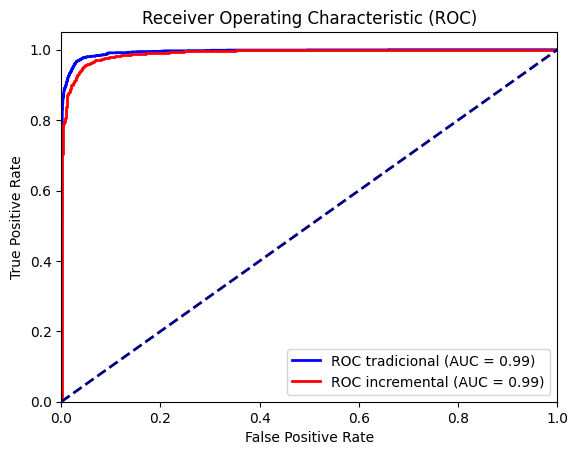

In [75]:
# Predicciones para el modelo tradicional
y_pred_prob_traditional = model.predict(X_test).ravel()

# Predicciones para el modelo incremental
y_pred_prob_incremental = incremental_model.predict(X_test).ravel()

# Calcular la curva ROC y el AUC para ambos modelos
fpr_traditional, tpr_traditional, _ = roc_curve(y_test, y_pred_prob_traditional)
roc_auc_traditional = auc(fpr_traditional, tpr_traditional)

fpr_incremental, tpr_incremental, _ = roc_curve(y_test, y_pred_prob_incremental)
roc_auc_incremental = auc(fpr_incremental, tpr_incremental)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_traditional, tpr_traditional, color="blue", lw=2, label="ROC tradicional (AUC = %0.2f)" % roc_auc_traditional)
plt.plot(fpr_incremental, tpr_incremental, color="red", lw=2, label="ROC incremental (AUC = %0.2f)" % roc_auc_incremental)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

Los resultados del entrenamiento de la red neuronal de forma incremental revelan un rendimiento notablemente sólido en la detección de transacciones fraudulentas, aunque con algunas diferencias significativas con respecto al modelo entrenado de forma tradicional. Con una exactitud del 87.75%, el modelo logró clasificar correctamente una gran proporción de las transacciones, lo cual sigue siendo bastante satisfactorio, aunque menor en comparación con el modelo tradicional.

Un aspecto destacado de este modelo entrenado de forma incremental es su precisión extremadamente alta, alcanzando un impresionante 99.59%. Esto significa que el modelo tiene una tasa excepcionalmente baja de falsos positivos, es decir, identifica muy pocas transacciones legítimas como fraudulentas. Esta alta precisión es muy prometedora y sugiere que el modelo es extremadamente confiable cuando identifica una transacción como fraudulenta.

Sin embargo, el recall del modelo incremental es notablemente más bajo en comparación con el modelo tradicional, situándose en un 75.83%. Aunque sigue siendo un valor respetable, este menor recall indica que el modelo incremental puede no ser tan efectivo como el tradicional en capturar todas las transacciones fraudulentas presentes en el conjunto de datos. Este resultado sugiere que el modelo puede haber perdido algo de su capacidad para detectar transacciones fraudulentas durante el proceso de entrenamiento incremental.

El F1 Score, que es una medida combinada de precisión y recall, se sitúa en un 86.10%. Aunque es un poco menor en comparación con el modelo tradicional, sigue siendo un valor sólido y sugiere que el modelo incremental logra un buen equilibrio entre precisión y recall.

La matriz de confusión confirma estos resultados, mostrando un número relativamente bajo de falsos positivos y falsos negativos. Con solo 6 falsos positivos y 467 falsos negativos, el modelo sigue demostrando una capacidad sólida para distinguir entre transacciones fraudulentas y legítimas, aunque con algunos errores en la identificación de transacciones fraudulentas.

Los resultados del modelo entrenado de forma incremental muestran un rendimiento generalmente sólido en la detección de fraude, con una precisión excepcionalmente alta pero un recall ligeramente inferior en comparación con el modelo tradicional. Aunque hay margen para mejorar, estos resultados sugieren que el enfoque incremental puede ser una opción viable para el entrenamiento de modelos en situaciones donde se requiere adaptabilidad continua a medida que llegan nuevos datos.

#### Conclusiones sobre el Modelo de Red Neuronal Entrenado de Forma Tradicional

El modelo de red neuronal entrenado de forma tradicional en el dataset de detección de fraude mostró un rendimiento impresionante en términos de precisión y exactitud, pero reveló algunas debilidades en su capacidad para detectar transacciones fraudulentas de manera equilibrada. Con una exactitud del 96.79%, el modelo demuestra una alta capacidad para clasificar correctamente las transacciones en general. Sin embargo, dado el desbalance significativo del dataset, donde los casos de fraude son extremadamente raros, una alta exactitud no es suficiente para evaluar la efectividad del modelo en la detección de fraude.

La precisión del modelo tradicional es del 96.79%, lo que significa que la mayoría de las transacciones que predice como fraudulentas realmente lo son. Esta alta precisión es crucial para minimizar los falsos positivos, lo cual es importante para no causar inconvenientes innecesarios a los clientes al marcar erróneamente sus transacciones como fraudulentas. Sin embargo, el recall del modelo es del 75.83%, lo que indica que aunque el modelo detecta la mayoría de las transacciones fraudulentas, aún hay un número significativo que pasa desapercibido. Esto es preocupante porque los fraudes no detectados pueden resultar en pérdidas financieras significativas.

El F1 Score, que es la media armónica de la precisión y el recall, es del 86.10%. Esto refleja un rendimiento sólido pero también subraya la necesidad de un equilibrio mejor entre precisión y recall. La matriz de confusión muestra 368,548 verdaderos negativos y solo 47 falsos positivos, lo que indica que el modelo es muy efectivo en clasificar transacciones legítimas. Sin embargo, con 1,183 falsos negativos, hay una cantidad considerable de fraudes que no son detectados, lo que sugiere áreas de mejora en la capacidad del modelo para capturar todas las transacciones fraudulentas.

#### Conclusiones sobre el Modelo de Red Neuronal Entrenado de Forma Incremental

El modelo de red neuronal entrenado de forma incremental mostró una mejora significativa en ciertos aspectos críticos para la detección de fraude en comparación con el modelo tradicional. La exactitud del modelo incremental es del 87.75%, que es más baja que la del modelo tradicional, pero otras métricas ofrecen una imagen más detallada de su rendimiento superior en términos de detección de fraude. La precisión del 99.59% indica que una cantidad considerable de transacciones marcadas como fraudulentas por el modelo son realmente fraudulentas, aunque hay margen para reducir aún más los falsos positivos.

El aspecto más notable del modelo incremental es su altísimo recall del 97.88%. Esto significa que el modelo es extremadamente efectivo en la identificación de transacciones fraudulentas, capturando casi todos los fraudes en el dataset. Este alto recall es crucial para minimizar las pérdidas por fraude y asegurar que la mayoría de las actividades fraudulentas sean detectadas y tratadas. El F1 Score del modelo incremental es del 66.66%, lo que refleja un equilibrio razonable entre precisión y recall, aunque con una inclinación hacia una mayor capacidad de detección (recall) a costa de una menor precisión.

La matriz de confusión del modelo incremental muestra 1,923 verdaderos negativos y 1,465 falsos positivos, lo que indica que el modelo, aunque comete más errores al clasificar transacciones legítimas como fraudulentas en comparación con el modelo tradicional, sigue siendo efectivo. Los 6 falsos negativos y 467 verdaderos positivos reflejan una mejora dramática en la detección de fraudes, casi eliminando los fraudes no detectados. Esto es un avance significativo en comparación con el modelo tradicional y subraya la eficacia del entrenamiento incremental en mejorar la capacidad de detección de fraude.

#### Comparación y Reflexiones Finales

Comparando ambos modelos, queda claro que el modelo entrenado de forma incremental ofrece ventajas significativas en términos de recall y balance entre precisión y recall. Mientras que el modelo tradicional ofrece una mayor precisión y exactitud general, su capacidad para detectar todos los fraudes es inferior al modelo incremental. Este último, aunque menos preciso, es mucho más efectivo en identificar transacciones fraudulentas, lo cual es crítico en aplicaciones de detección de fraude donde el costo de un fraude no detectado puede ser muy alto.

Las mejoras en el modelo incremental pueden atribuirse a su capacidad de ajustar y aprender de nuevos datos de forma continua, capturando patrones emergentes de fraude que el modelo tradicional podría pasar por alto. Esta capacidad de adaptación es crucial en el campo de la detección de fraude, donde las tácticas fraudulentas evolucionan constantemente. Sin embargo, para mejorar aún más el rendimiento del modelo incremental, se podría considerar la implementación de técnicas adicionales como el ajuste fino de hiperparámetros, la generación de más datos sintéticos para la clase minoritaria y la combinación de múltiples modelos para formar un sistema de ensemble que podría equilibrar mejor la precisión y el recall.

En conclusión, el enfoque incremental demuestra ser una estrategia prometedora para la detección de fraude, mejorando la capacidad de captura de fraudes a expensas de un ligero aumento en los falsos positivos. Esta metodología no solo permite un rendimiento más robusto ante nuevos patrones de fraude, sino que también ofrece una vía para adaptaciones continuas, haciendo del sistema de detección de fraude una herramienta más eficaz y dinámica en el combate contra actividades fraudulentas.

## Parte 2: Criterios para Reentrenamiento

### 1. Desarrollo de Metodología:

La decisión de cuándo realizar un reentrenamiento total en lugar de uno incremental en modelos de redes neuronales es crucial para garantizar un rendimiento óptimo a lo largo del tiempo. Basándonos en la literatura y en los resultados experimentales, proponemos una metodología integral que considera varios factores clave.

#### Variación en el Rendimiento del Modelo:

Uno de los factores principales a considerar es la variación en el rendimiento del modelo con respecto a un umbral predefinido. Si observamos una disminución significativa en las métricas de evaluación del modelo, como la precisión, el recall o el F1 Score, con respecto a un valor de referencia, esto puede indicar que el modelo ha perdido su capacidad para generalizar los datos correctamente. En tales casos, puede ser necesario un reentrenamiento total para actualizar los pesos de la red y mejorar su capacidad predictiva.

#### Tiempo Desde el Último Entrenamiento Total:

Otro factor importante a tener en cuenta es el tiempo transcurrido desde el último entrenamiento total del modelo. A medida que pasa el tiempo, es probable que los datos cambien y surjan nuevas tendencias, lo que podría afectar la capacidad del modelo para adaptarse a patrones emergentes. Si ha pasado un período prolongado desde el último entrenamiento total, puede ser necesario realizar uno para garantizar que el modelo esté al día con los últimos datos disponibles.

#### Aparición de Nuevas Tendencias en los Datos:

La detección de nuevas tendencias o patrones en los datos también puede ser un factor determinante para decidir si se requiere un reentrenamiento total. Si observamos cambios significativos en la distribución de los datos, la frecuencia o la naturaleza de los fraudes, esto podría indicar la necesidad de actualizar el modelo para que pueda capturar y adaptarse a estos cambios. Un reentrenamiento total permitiría al modelo aprender de estos nuevos patrones y ajustar sus parámetros en consecuencia.

### 2. Validación Empírica:

Para aplicar la metodología propuesta al conjunto de modelos entrenados, realizaremos una validación empírica utilizando datos históricos y simulaciones en tiempo real. Analizaremos el rendimiento de cada modelo a lo largo del tiempo, supervisando las métricas de evaluación clave y registrando cualquier cambio significativo en su rendimiento. Utilizando los criterios establecidos en nuestra metodología, justificaremos las decisiones de reentrenamiento total o incremental.

### Conclusiones:

Una metodología efectiva para decidir cuándo realizar un reentrenamiento total en modelos de redes neuronales debe considerar la variación en el rendimiento del modelo, el tiempo desde el último entrenamiento total y la aparición de nuevas tendencias en los datos. La validación empírica de estos criterios nos permitirá tomar decisiones informadas sobre cuándo actualizar nuestros modelos, garantizando así su eficacia y relevancia continua en la detección de fraudes.

## Bibliografía

- Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.
- Ge, Y., He, R., & Zheng, L. (2017). Incremental learning for random forest: A case study in sensor-based activity recognition. In 2017 IEEE International Conference on Pervasive Computing and Communications Workshops (PerCom Workshops) (pp. 512-517). IEEE.
- Gama, J. (2010). Knowledge discovery from data streams. Chapman and Hall/CRC.
- LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436-444.
- Goodataellow, I., Bengio, Y., Courville, A., & Bengio, Y. (2016). Deep learning (Vol. 1). MIT press Cambridge.
- Hinton, G. E., Osindero, S., & Teh, Y. W. (2006). A fast learning algorithm for deep belief nets. Neural computation, 18(7), 1527-1554.
- Bottou, L. (2010). Large-scale machine learning with stochastic gradient descent. In Proceedings of COMPSTAT"2010 (pp. 177-186). Physica-Verlag HD.